In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

In [2]:
data =  pd.read_csv('../../../Data/pv_power_df_5day_capacity_scaled.csv', index_col='datetime').drop(columns=['2657', '2828']) #DROPPING FAULTY SYSTEMS
uk_pv = pd.read_csv('../../../Data/system_metadata_location_rounded.csv')
uk_pv['ss_id_string'] = uk_pv['ss_id'].astype('str')

array([[<AxesSubplot:title={'center':'ss_id'}>,
        <AxesSubplot:title={'center':'latitude_rounded'}>],
       [<AxesSubplot:title={'center':'longitude_rounded'}>,
        <AxesSubplot:title={'center':'orientation'}>],
       [<AxesSubplot:title={'center':'tilt'}>,
        <AxesSubplot:title={'center':'kwp'}>]], dtype=object)

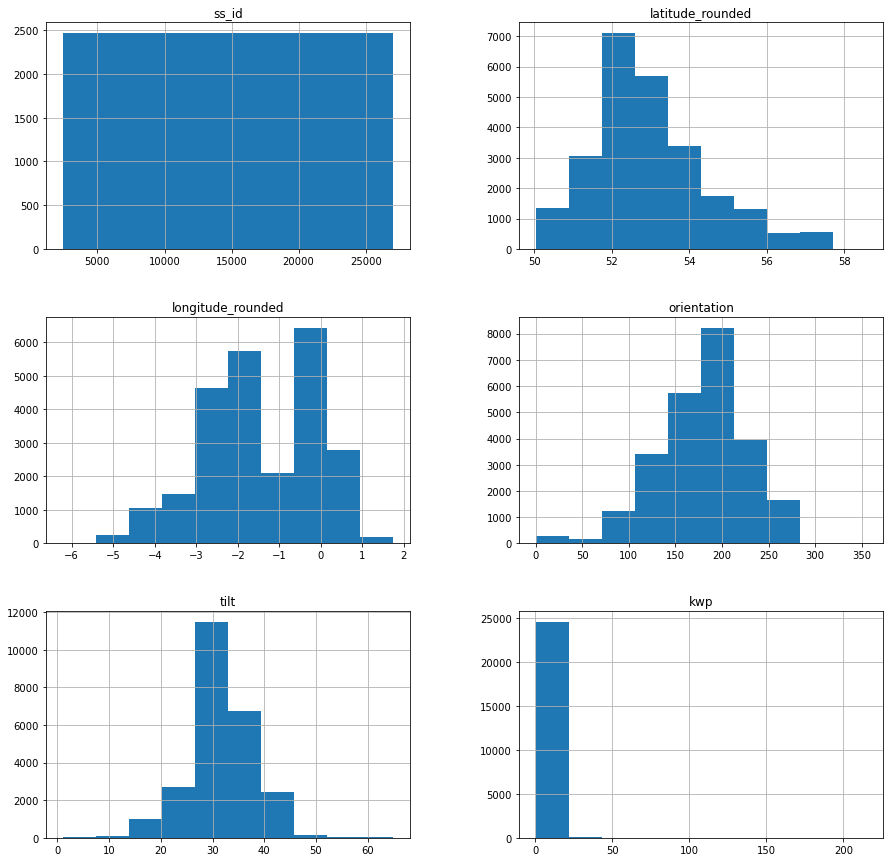

In [3]:
uk_pv.hist(figsize=(15,15))

In [4]:
data.mean()

2607     0.305711
2625     0.322867
2626     0.223041
2631     0.166863
2660     0.111542
           ...   
27059    0.304188
27061    0.204538
27063    0.239962
27064    0.310584
27067    0.250935
Length: 879, dtype: float64

In [5]:
key_stats = uk_pv.set_index('ss_id_string')[['orientation', 'tilt', 'kwp']]
key_stats['avg_gen'] = data.mean()
key_stats = key_stats.dropna()

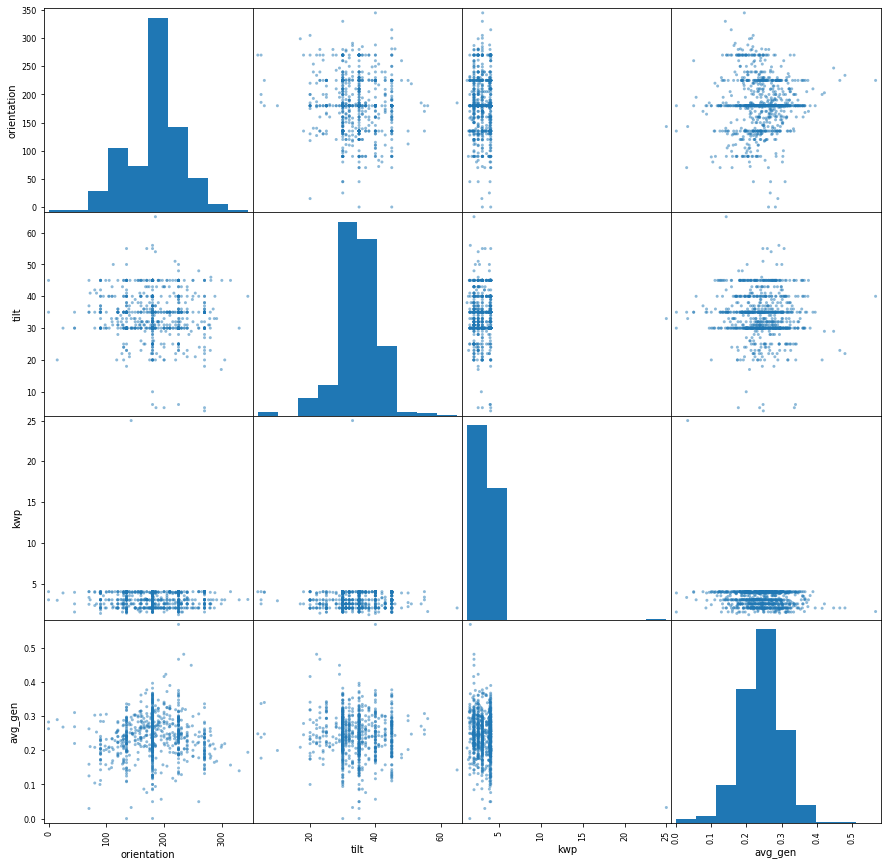

In [6]:
pd.plotting.scatter_matrix(key_stats, figsize=(15,15));

In [7]:
import statsmodels.api as sm

X = key_stats.iloc[:, :-1]
Y = key_stats.iloc[:, -1]
mod = sm.OLS(Y, sm.add_constant(X, prepend=False), )
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                avg_gen   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     10.41
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           9.85e-07
Time:                        15:27:53   Log-Likelihood:                 1225.2
No. Observations:                 879   AIC:                            -2442.
Df Residuals:                     875   BIC:                            -2423.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
orientation  3.888e-05    4.3e-05      0.903      

In [8]:
key_stats[key_stats.kwp  > 5]

,orientation,tilt,kwp,avg_gen
ss_id_string,,,,
26966,143.0,33.0,25.0,0.032389


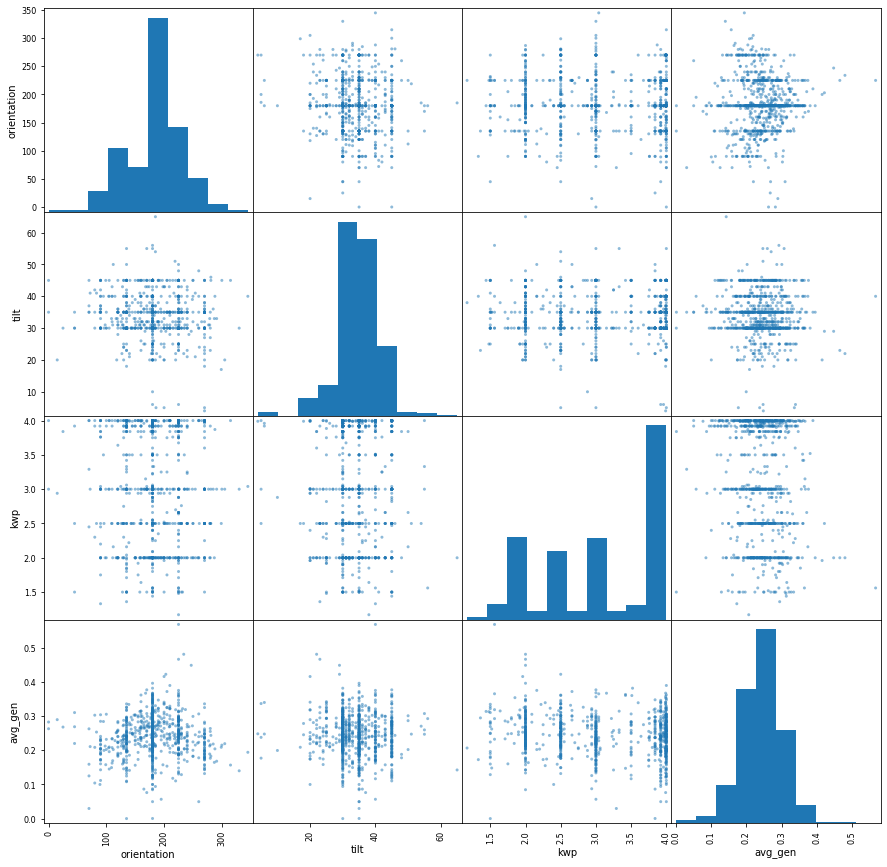

In [9]:

key_stats_cleaned = key_stats.drop('26966')
pd.plotting.scatter_matrix(key_stats_cleaned, figsize=(15,15));

In [10]:
import statsmodels.api as sm

X = key_stats_cleaned.iloc[:, :-1]
Y = key_stats_cleaned.iloc[:, -1]
mod = sm.OLS(Y, sm.add_constant(X, prepend=False), )
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                avg_gen   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     6.306
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           0.000311
Time:                        15:27:54   Log-Likelihood:                 1223.3
No. Observations:                 878   AIC:                            -2439.
Df Residuals:                     874   BIC:                            -2419.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
orientation  3.887e-05   4.31e-05      0.902      